<a href="https://colab.research.google.com/github/padath314/NetworkX-contribution/blob/main/Traversal_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traversal**

In this tutorial, we will explore the python implementation of different traversal algorithms implemented at `networkx/algorithms/traversal`.

## Graph Traversal
Graph Traversal simply means to visiting each node in a graph. These can be classifies on the basis of the order in which nodes are visited.

## Algorithms

There a few different algorithms that are implemented for graph traversal.

## Breadth First Search

It is implemeneted at `networks/algorithms/traversal/breadth_first_search.py`

### Example Graph

The following code demonstrates how a graph can be constructed and visualised using networkx.
We use the function `draw_planar' to draw the planar graph.

In [ ]:
# import packages
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Add edges to the graph
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 11), (4, 6), (8, 2), (3, 8), (3, 9), (4, 10), (4, 7), (5, 6), (5, 9), (6, 8), (7, 11), (9, 10), (9, 11), (10, 12), (11, 12)])

# Print the graph information
print("Graph nodes:", G.nodes())
print("Graph edges:", G.edges())




Graph nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Graph edges: [(1, 2), (1, 3), (1, 4), (2, 8), (3, 11), (3, 8), (3, 9), (4, 6), (4, 10), (4, 7), (5, 6), (5, 9), (6, 8), (7, 11), (9, 10), (9, 11), (10, 12), (11, 12)]


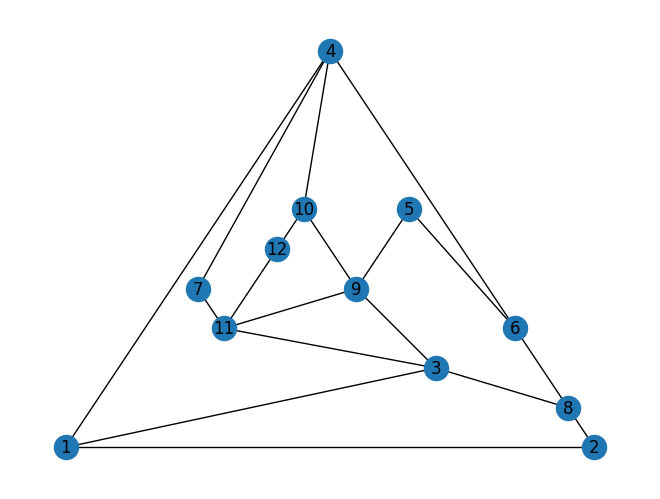

In [ ]:
nx.draw_planar(G,with_labels=True)

The same graph can be further used to visualise bfs using bfs_tree.

### BFS Tree

The following code shows how to visualies a bfs tree on an existing graph. We save the bfs_tree into a variable then redraw these edges i.e the edges in the bfs tree in a different color. The draw_network_edges function is used.

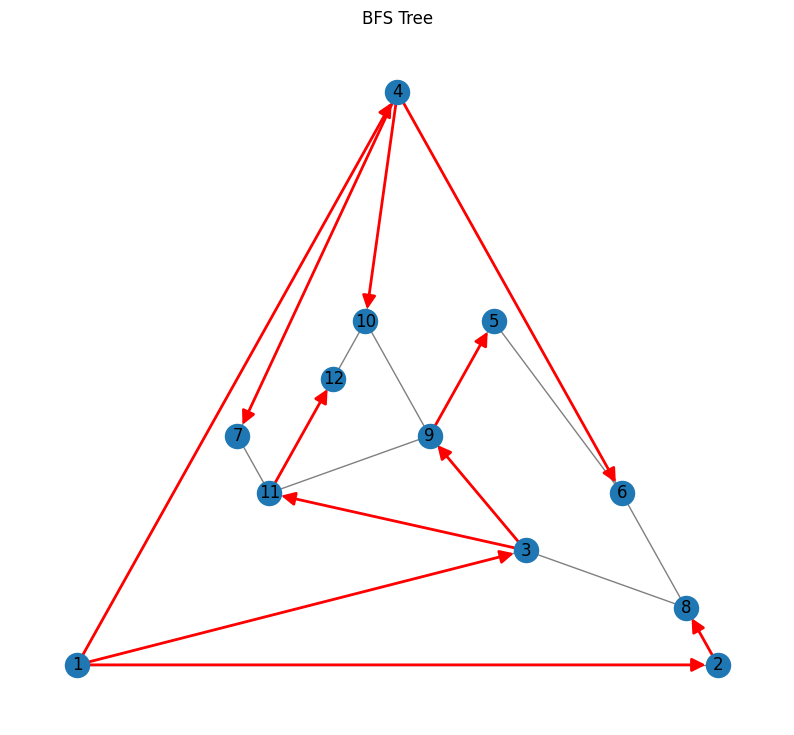

In [ ]:
bfs_tree = nx.bfs_tree(G,1)

pos = nx.planar_layout(G)  # Positions of the nodes using planar layout
plt.figure(figsize=(10, 9))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(bfs_tree, pos, edge_color='red', width=2, arrowsize=20)
plt.title("BFS Tree")
plt.axis('off')
plt.show()

### A better respresentation of BFS Tree

In order to better visualise the BFS Tree so obtained, we can tweak some parameters of some nx functions to display the different levels of bfs tree in a more orderly way.

The `pos` dictionary is used to store the x-y coordinates of each node in the BFS tree. Initially, it only contains the position of the root node, which is set as the origin (0, 0).

During the BFS procedure, the x and y coordinates for each node are determined as follows:

- The x coordinate is calculated based on the number of children the node's parent has. It ensures that the children are evenly spaced horizontally between 0 and 1 on the x-axis.
- The y coordinate is determined by the number of levels the node is away from the root. It positions the nodes vertically above the current depth level.

By iterating through the BFS tree layer by layer, the code assigns appropriate x and y coordinates to each node, progressively building the layer-by-layer visualization of the tree.


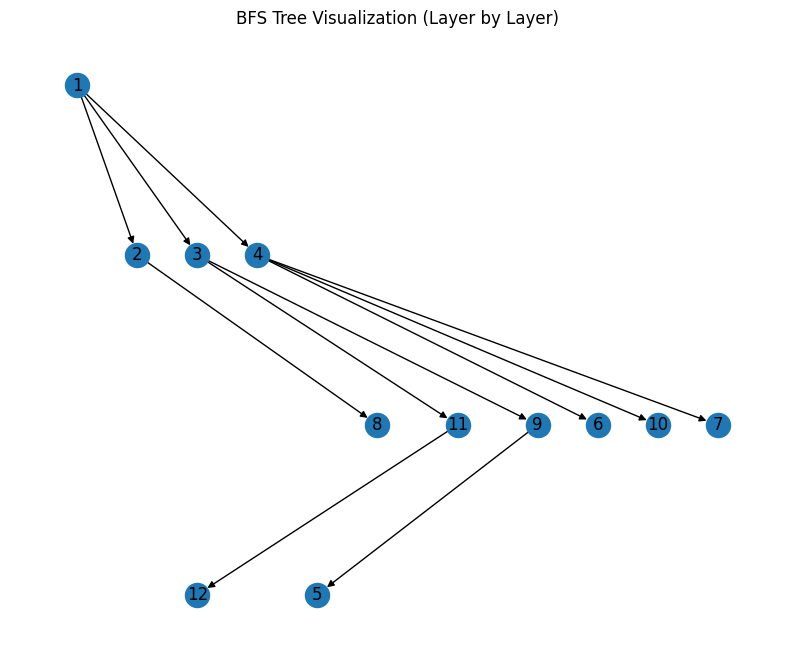

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def layer_by_layer(edges, root_node):
    # Create a directed graph from the given edges
    G = nx.DiGraph(edges)

    # Set the position of the root node
    pos = {root_node: (0, 0)}

    # Set the height of direct children
    height = 1

    # Initialize the current layer
    current_layer = [root_node]
    prev_x = 0  # Initialize the previous x position

    # Iterate through the graph layer by layer
    while current_layer:
        next_layer = []
        for node in current_layer:
            children = [child for _, child in edges if node == _ and child not in pos]
            num_children = len(children)

            if num_children > 0:
                # Calculate the step based on the previous x position
                step = 1 / (num_children + 1)
            else:
                # If there are no children, reset the previous x position to 0
                prev_x = 0
                continue

            for i, child in enumerate(children):
                x = prev_x + step * (i + 1)  # Use the previous x position and step
                y = -height
                pos[child] = (x, y)
                next_layer.append(child)

            if children:
                # Update the previous x position with the x-coordinate of the last child
                prev_x = pos[children[-1]][0]

        current_layer = next_layer
        height += 1

    return pos


# Example usage:
root_node = 1
edges = list(nx.bfs_edges(bfs_tree, root_node))  # or list(nx.dfs_edges(dfs_tree, root_node))

pos = layer_by_layer(edges, root_node)

# Create a figure with a larger size
plt.figure(figsize=(10, 8))

# Draw the nodes with light blue color and larger size
nx.draw_networkx_nodes(bfs_tree, pos)

# Draw the edges of the BFS tree with red color, thicker lines, and larger arrowheads
nx.draw_networkx_edges(bfs_tree, pos, arrowsize=10)

# Draw the labels of the nodes with white font color
nx.draw_networkx_labels(bfs_tree, pos)

# Set a title for the plot
plt.title("BFS Tree Visualization (Layer by Layer)")

# Turn off the axis labels and ticks
plt.axis('off')

# Show the plot
plt.show()


### BREADTH FIRST SEARCH ALGORITHM

The Breadth-First Search (BFS) algorithm is a graph traversal algorithm that explores all the vertices of a graph in breadth-first order. It starts at a given source vertex and explores all its neighbors before moving on to their neighbors. BFS visits vertices in layers, where the layer closest to the source vertex is visited first.

The BFS algorithm uses a queue to keep track of the vertices that need to be visited in the next layer. The algorithm starts by enqueuing the source vertex. Then, it repeatedly dequeues a vertex from the queue, visits it, and enqueues all its unvisited neighbors. This process continues until the queue becomes empty, indicating that all vertices have been visited.

The BFS algorithm can be summarized as follows:

1. Enqueue the source vertex.
2. While the queue is not empty:
  - Dequeue a vertex from the queue.
  - Visit the dequeued vertex.
  - Enqueue all unvisited neighbors of the dequeued vertex.
3. The algorithm terminates when the queue becomes empty, indicating that all vertices have been visited.

### How networkx implements BFS

Now let us look at how networkx implements bfs.
#### functions

The following are some of the python functions present in `breadth_first_search.py` that help in implementing bfs.

- generic_bfs_edges
- bfs_edges
- bfs_tree
- bfs_predecessors
- bfs_successors
- bfs_layers
- bfs_labeled_edges
- descendants_at_distance

The `bfs_edges` function performs a breadth-first search on a graph and yields the edges encountered during the search. It uses a helper function `generic_bfs_edges` which does the actual BFS by inculcating few parameters like source node, function to determine the neighbour orderm depth limit, etc.

### How `generic_bfs_edges` implements bfs



```python
seen = {source}
n = len(G)
depth = 0
next_parents_children = [(source, neighbors(source))]
```

The above lines of code in the function `generic_bfs_edges()` does the following:
- Create a set called `seen` to keep track of all the nodes that has already been visited. Initially this will contain only the source node.
- Get the number of vertices in the graph G and assign it to the variable n. This provides the total number of vertices in the graph and will be used to determine the termination condition for the BFS traversal.
-  Initialize the variable depth to 0. This variable represents the current depth level of the BFS traversal. It starts at 0, indicating the initial level.
-  Create a list called next_parents_children and initialize it with a single tuple (source, neighbors(source)). This tuple represents the source vertex and its corresponding neighbors. The purpose of this list is to keep track of the vertices that will be explored in the next level of the BFS traversal.

```python
while next_parents_children and depth < depth_limit:
        this_parents_children = next_parents_children
        next_parents_children = []
        for parent, children in this_parents_children:
            for child in children:
                if child not in seen:
                    seen.add(child)
                    next_parents_children.append((child, neighbors(child)))
                    yield parent, child
            if len(seen) == n:
                return
        depth += 1
```

The above lines of code show the while loop that traverses:

- The while loop conditions are:
  - As long as there are vertices to explore in the current level
  - Depth < depth_limit

- Refresh `this_parent_children` and `next_parent_children`
- For each `(parent, children)` tuple in the `this_parent_children` list
  - Take each child one by one and check if it has already been seen
  - If it has not been seen, add it to the visited list and add its neighbors to the `next_parent_children` list
  - **CRUCIAL STEP**: Yield this particular edge as it is used in traversal, i.e., `yield parent, child`
- Check if all nodes have been visited

Hence, BFS is successfully done. This algorithm visits all nodes reachable from the starting node in a breadth-first manner. It explores all the nodes at the current depth level before moving on to the nodes at the next depth level. By doing so, it guarantees that all nodes at a particular depth are visited before moving deeper into the graph. This ensures that all nodes reachable from the starting node are visited, making BFS a complete traversal algorithm.

#### Adding the additional parameters

```python
  if neighbors is None:
        neighbors = G.neighbors
  if sort_neighbors is not None:
      _neighbors = neighbors
      neighbors = lambda node: iter(sort_neighbors(_neighbors(node)))
  if depth_limit is None:
      depth_limit = len(G)
```



- If the `neighbors` parameter is None:
  - Set `neighbors` to the `G.neighbors` function, which returns the neighbors of a given node in graph `G`.

- If the `sort_neighbors` parameter is not None:
  - Assign the current `neighbors` function to `_neighbors` as a backup.
  - Set `neighbors` to a lambda function that takes a node as input and returns an iterator over the neighbors of that node, sorted using the `sort_neighbors` function.

- If the `depth_limit` parameter is None:
  - Set `depth_limit` to the number of nodes in graph `G`.

### `bfs_edges` the wrapper function



The `bfs_edges` function acts as a wrapper, calling the `generic_bfs_edges` function. It performs the following steps:

1. Check if the graph is directed or undirected.
2. If directed, directly call the `generic_bfs_edges` function.
3. If undirected, check if a root node is specified.
4. If no root node is specified, select an arbitrary node as the root.
5. Initialize a `visited` set to track visited nodes.
6. Call the `generic_bfs_edges` function with the graph, root node, and `visited` set.
7. The `generic_bfs_edges` function performs BFS traversal and yields edges.
8. Collect and return the yielded edges.

By using this wrapper function, the code provides a simpler way to obtain BFS edges from both directed and undirected graphs.


### Some other functions related to BFS

// can add explanation for bfs_tree


### descendants_at_distance(G, source, distance)
Returns all nodes at a fixed distance from source in G.

#### Parameters:

- G: NetworkX graph
- source: node in G
- distance: the distance of the wanted nodes from source
#### Returns:

- set() :
The descendants of source in G at the given distance from source

Given below is the visualisation of the function :

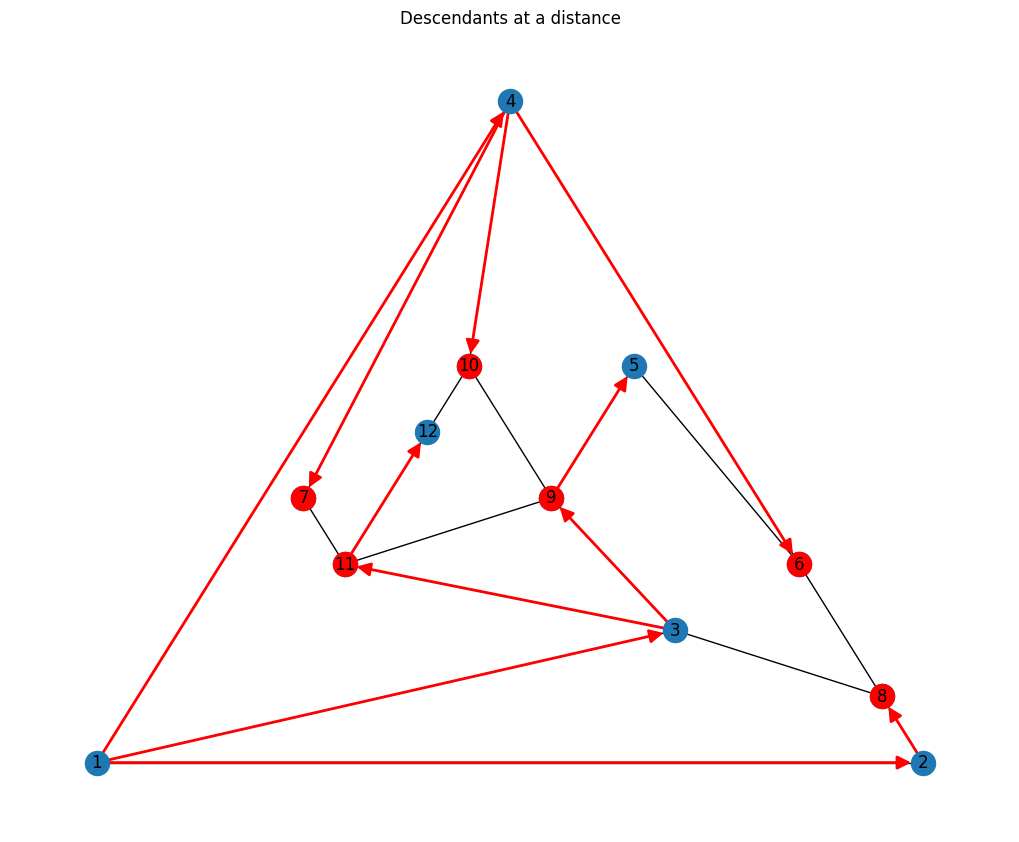

In [ ]:
two = nx.descendants_at_distance(G, 1, 2)

# Create a figure with a larger size
plt.figure(figsize=(10, 8))

nx.draw_planar(G,with_labels=True)
pos = nx.planar_layout(G)
nx.draw_networkx_edges(bfs_tree, pos, edge_color='red', width=2, arrowsize=20)
nx.draw_networkx_nodes(two, pos, node_color='red')

# Set a title for the plot
plt.title("Descendants at a distance")

# Turn off the axis labels and ticks
plt.axis('off')

# Show the plot
plt.show()


### Conclusion for BFS

Hence we have seen how BFS is implemented in networkx.

// can include a few more examples from the data set


In [ ]:
F = nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(), nodetype = int)

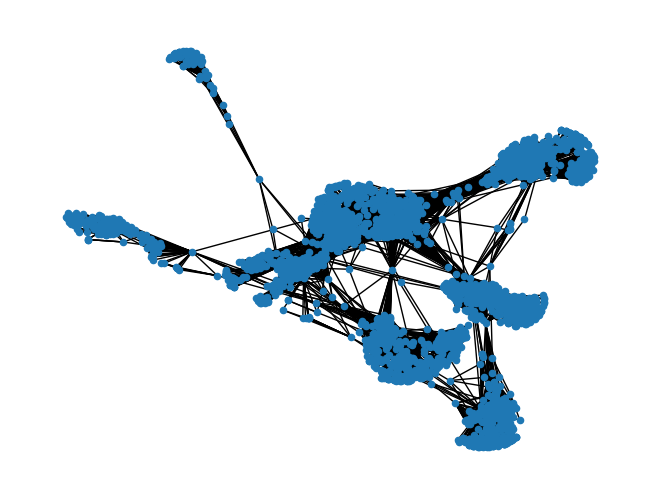

In [ ]:
selected_nodes =  range(0,5000)
subgraph = F.subgraph(selected_nodes)
posf = nx.spring_layout(subgraph)
nx.draw(subgraph, posf, node_size=20)

In [ ]:
# find friends of node number 200
frnds = nx.descendants_at_distance(subgraph,50,1)
mutual = nx.descendants_at_distance(subgraph,50,2)
next =  nx.descendants_at_distance(subgraph,50,3)

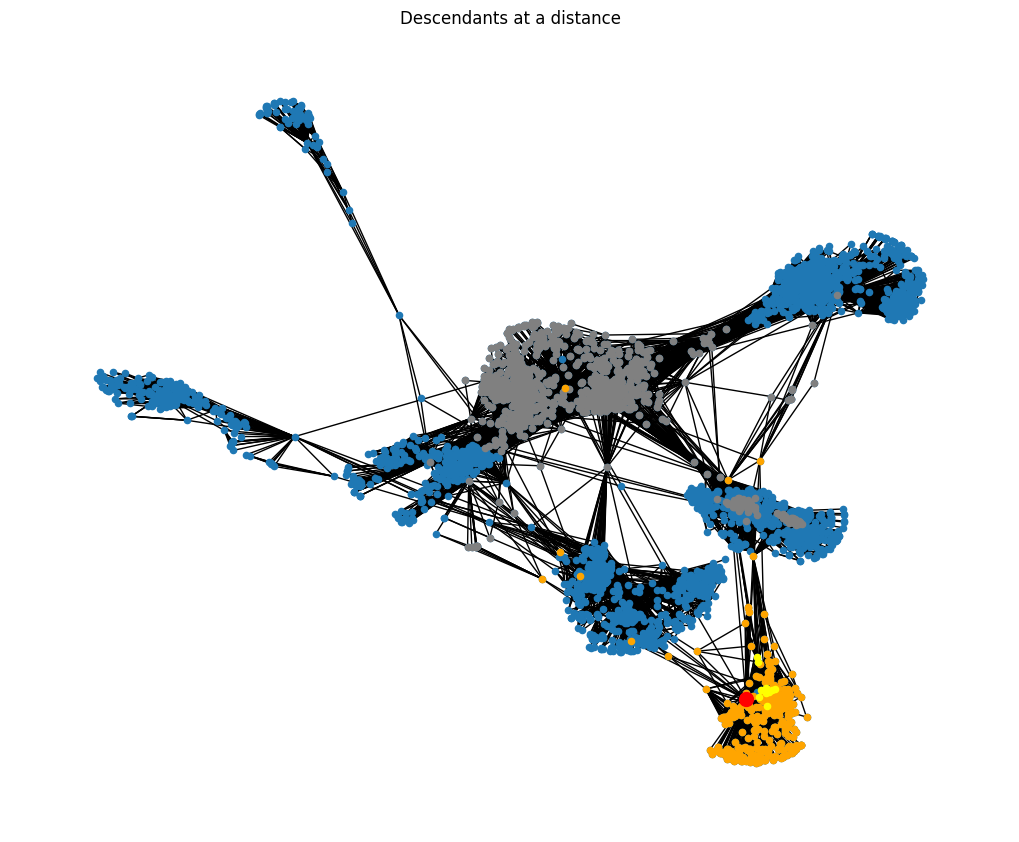

In [ ]:
# Create a figure with a larger size
plt.figure(figsize=(10, 8))

nx.draw(subgraph, posf,node_size=20)
nx.draw_networkx_nodes(next, posf, node_color='grey',node_size=20)
nx.draw_networkx_nodes(mutual, posf, node_color='orange',node_size=20)
nx.draw_networkx_nodes(frnds, posf, node_color='yellow',node_size=20)
nx.draw_networkx_nodes(subgraph, posf, nodelist=[0], node_color='red', node_size=100)


# Set a title for the plot
plt.title("Descendants at a distance")

# Turn off the axis labels and ticks
plt.axis('off')

# Show the plot
plt.show()

## Depth-First Search

It is implemented at `networkx/algorithms/traversal/depth_first_search.py`

We will use the same graph as used in BFS.

Let us see the visualisation of DFS Tree in it.

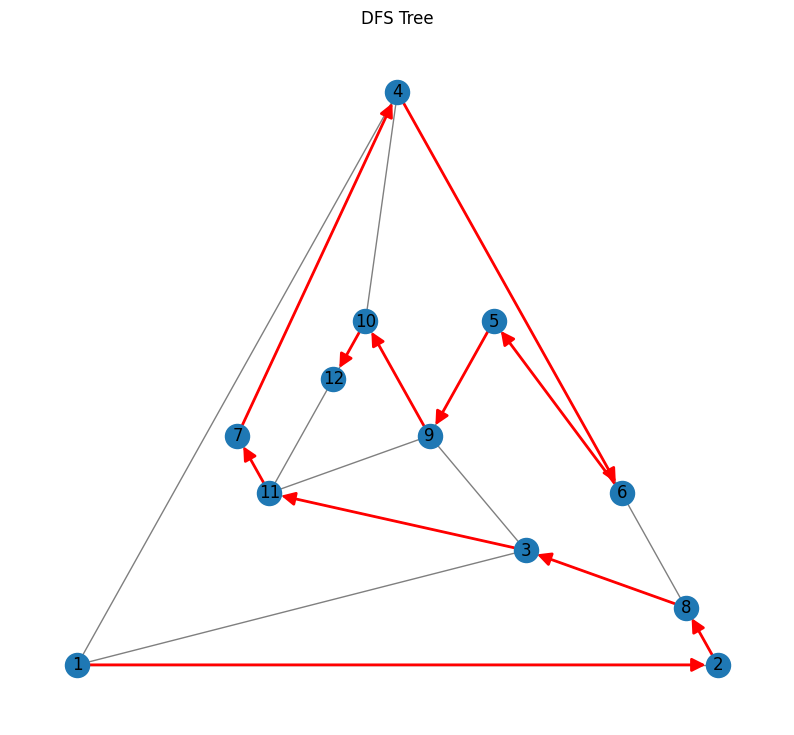

In [ ]:
dfs_tree = nx.dfs_tree(G,1)

pos = nx.planar_layout(G)  # Positions of the nodes using planar layout
plt.figure(figsize=(10, 9))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(dfs_tree, pos, edge_color='red', width=2, arrowsize=20)
plt.title("DFS Tree")
plt.axis('off')
plt.show()

### A better representation of DFS Tree

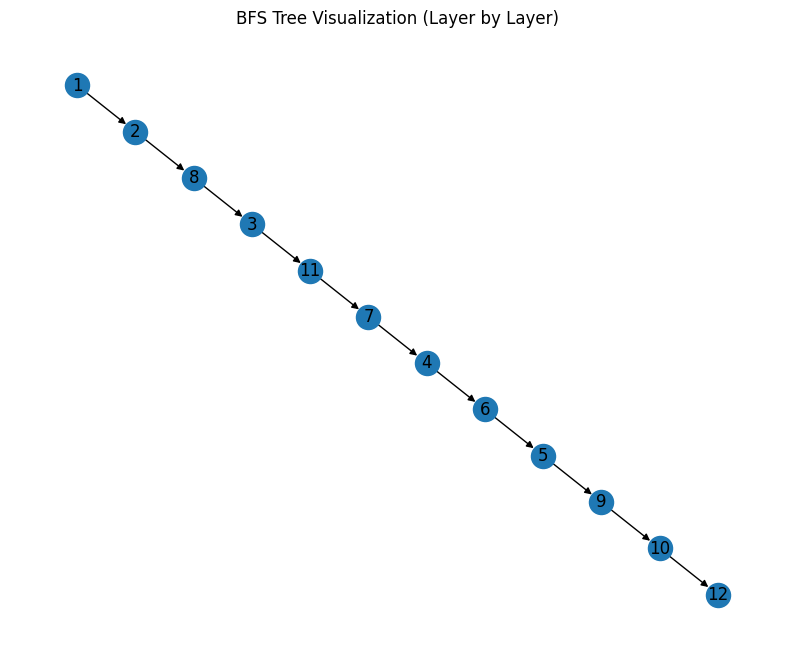

In [ ]:
#this is not working

edges = list(nx.dfs_edges(G, 1))  # or list(nx.dfs_edges(dfs_tree, root_node))

pos = layer_by_layer(edges, 1)

# Create a figure with a larger size
plt.figure(figsize=(10, 8))

# Draw the nodes with light blue color and larger size
nx.draw_networkx_nodes(dfs_tree, pos)

# Draw the edges of the BFS tree with red color, thicker lines, and larger arrowheads
nx.draw_networkx_edges(dfs_tree, pos,arrowsize=10)

# Draw the labels of the nodes with white font color
nx.draw_networkx_labels(dfs_tree, pos)

# Set a title for the plot
plt.title("BFS Tree Visualization (Layer by Layer)")

# Turn off the axis labels and ticks
plt.axis('off')

# Show the plot
plt.show()


### DEPTH FIRST SEARCH ALGORITHM

The Depth-First Search (DFS) algorithm explores the vertices of a graph in a depth-first order. It starts from a given source vertex and then recursively visits the neighbors of its children, exploring as far as possible along each branch before backtracking.

DFS uses a stack to keep track of the vertices and their exploration order. It follows a LIFO (Last In, First Out) order. The algorithm visits a vertex and pushes its unvisited neighbors onto the stack for future exploration. This process continues until all vertices have been visited or there are no more unvisited vertices reachable from the current path.

The DFS algorithm can be summarized as follows:

1. Push the source vertex onto the stack.
2. While the stack is not empty:
   - Pop a vertex from the stack.
   - Visit the popped vertex.
   - Push all unvisited neighbors of the popped vertex onto the stack.
3. The algorithm terminates when the stack becomes empty, indicating that all vertices have been visited.



Key points about DFS:

- DFS can be implemented using recursion or iteration with a stack.
- It is useful for finding paths, cycles, or connected components in a graph.
- DFS does not guarantee the shortest path between two vertices.
- The order in which vertices are visited depends on the starting vertex and the structure of the graph.
- The algorithm can be modified to include additional conditions or constraints, such as depth limits or stopping criteria.

### How networkx implements DFS

Looking at how networkx implements dfs.

visited set
for all nodes in the node set
if not alread visited
stack is initialised with start and the iteratorfor its children,
now,

### How `dfs_edges` implement dfs



```python
if source is None:
    nodes = G
else:
    nodes = [source]

if depth_limit is None:
    depth_limit = len(G)

visited = set()
```

The above lines of code are responsible for initializing variables used in the dfs algorithm:
- If the `source` parameter is None,the variable `nodes` is set to `G`. This means that the search will cover all the components in the graph.
- If a specific `source` node is provided, the `nodes` variable is set to a list containing only that `source` node i.e the DFS will be limited to the component reachable from the specified `source` node.
- If no specific depth limit is provided for the search, the `depth_limit` is set to the total number of nodes in the graph `G`. This ensures that the search can potentially traverse the entire graph.
- An empty set called `visited`is set is used to keep track of nodes that have been visited during the depth-first search. Nodes are added to this set once they have been visited to avoid revisiting them.




```python
for start in nodes:
        if start in visited:
            continue
        visited.add(start)
        stack = [(start, iter(G[start]))]
        depth_now = 1
        while stack:
            parent, children = stack[-1]
            for child in children:
                if child not in visited:
                    yield parent, child
                    visited.add(child)
                    if depth_now < depth_limit:
                        stack.append((child, iter(G[child])))
                        depth_now += 1
                        break
            else:
                stack.pop()
                depth_now -= 1
```

The above lines of code show the for loop that traverses:

1. The for loop iterates over the nodes in the `nodes` list which represent the starting points for the DFS.

  - If the current node has already been visited the loop continues to the next iteration.

  - Given the current node has not already been visited then it is added to the `visited` set.

2. A stack is initialized with a tuple containing the current node `start` and an iterator over its neighbors in the graph `G` representing the initial state of the depth-first search.

3. The current depth level of the search, `depth_now` is initialized to 1.

4. The while loop continues until the stack is empty, i.e the depth-first search has finished exploring all reachable nodes.

  - The top element from the stack represents the current node and its remaining unvisited neighbors.

  - The for loop iterates over the unvisited neighbors of the current node.

  - If the current neighbor has not been visited before the following actions are performed:

      a. The edge`(parent, child)` is yielded and the current neighbor `child` is marked as visited.

      b. If the current depth level is less than the depth level:

        - The current neighbor `child` , along with an iterator over its neighbors is added to the stack i.e moving down to the next level of depth in the search.

        - The depth level is incremented.

        - Breaks out of the for loop to continur the while loop.

  - If the inner for loop completes without a break, ie all the neighbours of the current node has been visited :

    - The top element of the stack is popped, moving back up one level in the search.

    - The depth is decremented by 1.

In conclusion, DFS (Depth-First Search) is a traversal algorithm that successfully visits all nodes reachable from the starting node. It explores nodes in a depth-first manner by traversing as far as possible along each branch before backtracking. This ensures that all nodes in the graph are visited, although the order of visitation may not follow a breadth-first pattern. DFS is a complete traversal algorithm that guarantees the exploration of all reachable nodes from the starting point.

### Some other functions related to DFS

#### dfs_labeled_edges()


### Conclusion for DFS
Hence we have seen how DFS is implemented in networkx.

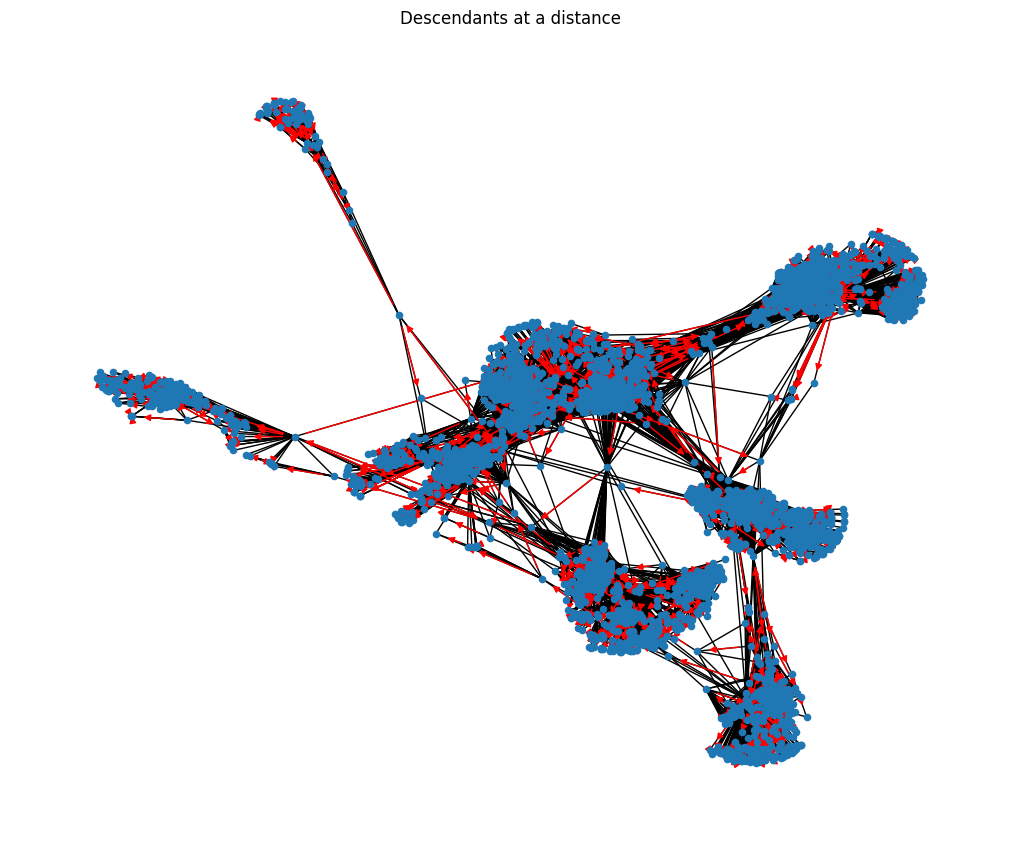

In [ ]:
dfs_tree = nx.dfs_tree(subgraph)

# Create a figure with a larger size
plt.figure(figsize=(10, 8))

nx.draw(subgraph,posf,node_size=20)
nx.draw_networkx_edges(dfs_tree,posf,edge_color='red')

# Set a title for the plot
plt.title("Descendants at a distance")

# Turn off the axis labels and ticks
plt.axis('off')

# Show the plot
plt.show()

## Beam Search
It is implemented at `networkx/algorithms/traversal/beamsearch.py`

We will the same graph G to visualise beam search.

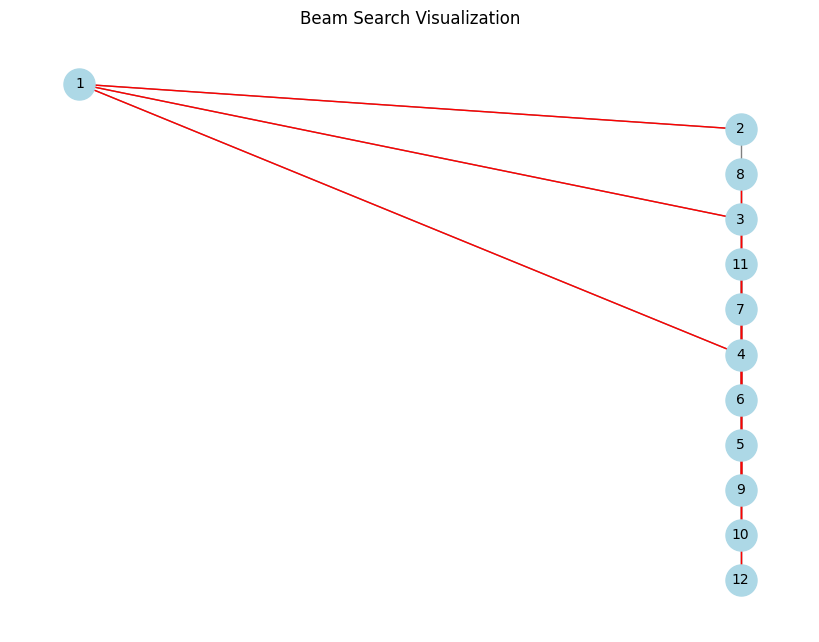

In [ ]:
centrality = nx.eigenvector_centrality(G)

# Set the source node and beam width
source = 1
width = 5

# Perform beam search and get the edges
beam_edges = list(nx.bfs_beam_edges(G, source, centrality.get, width))

# Create a subgraph containing the beam edges
subgraph1 = G.edge_subgraph(beam_edges)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, width=1.0, edge_color='gray')
nx.draw_networkx_edges(subgraph1, pos, edge_color='red')

plt.title("Beam Search Visualization")
plt.axis('off')
plt.show()

## References


below can be used in dfs

In [ ]:
def get_dfs_edge_labels(G):
    labels = {}
    for parent, child, label in nx.dfs_labeled_edges(G):
        edge = (parent, child)
        labels[edge] = label
    return labels

{(1, 1): 'reverse', (1, 2): 'reverse', (2, 1): 'nontree', (2, 8): 'reverse', (8, 2): 'nontree', (8, 3): 'reverse', (3, 1): 'nontree', (3, 11): 'reverse', (11, 3): 'nontree', (11, 7): 'reverse', (7, 4): 'reverse', (4, 1): 'nontree', (4, 6): 'reverse', (6, 4): 'nontree', (6, 5): 'reverse', (5, 6): 'nontree', (5, 9): 'reverse', (9, 3): 'nontree', (9, 5): 'nontree', (9, 10): 'reverse', (10, 4): 'nontree', (10, 9): 'nontree', (10, 12): 'reverse', (12, 10): 'nontree', (12, 11): 'nontree', (9, 11): 'nontree', (6, 8): 'nontree', (4, 10): 'nontree', (4, 7): 'nontree', (7, 11): 'nontree', (11, 9): 'nontree', (11, 12): 'nontree', (3, 8): 'nontree', (3, 9): 'nontree', (8, 6): 'nontree', (1, 3): 'nontree', (1, 4): 'nontree'}


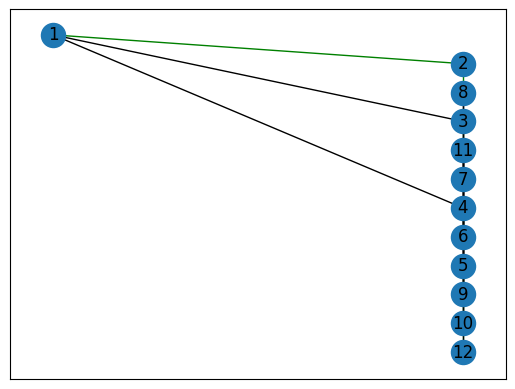

In [ ]:
labels = get_dfs_edge_labels(G)
print(labels)

# Create the figure and axes for the plot
fig, ax = plt.subplots()


# Define the colors for different edge types
edge_colors = {
    'forward': 'red',
    'nontree': 'black',
    'reverse': 'green'
    # Add more edge types and their colors if needed
}

# Iterate over the edges and draw them with the corresponding color based on their labels
for edge in G.edges():
    label = labels.get(edge)
    color = edge_colors.get(label, 'gray')  # Default to gray if label not found in edge_colors
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=color, ax=ax)

# Draw the nodes and labels
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

# Show the plot
plt.show()
